# **Multi-Label Text Classification CNN**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

import sys
sys.path.append('/content/gdrive/My Drive/dsci')

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import shutil
import tensorflow as tf
import pickle
import pandas as pd
import keras
import data_helpers
import LabelSimplifier
from keras.layers import Embedding, Dense, Activation, Dropout, MaxPooling1D, Conv1D, Flatten, LeakyReLU, BatchNormalization
import numpy as np
import gensim
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# **Text Cleaning & Generating Labels**

In [0]:
jobTitlesDF = pd.read_csv("/content/gdrive/My Drive/dsci/indeedJobsTest3.csv")
generalJobTitlesDF = pd.read_csv("/content/gdrive/My Drive/dsci/Job_title.csv")

#print(jobTitlesDF['RoleTitle'][0:10])
#processedJobTitles = data_helpers.removeStops(jobTitlesDF['RoleTitle'])
jobTitlesDF['RoleTitle'] = data_helpers.removeStops(jobTitlesDF)
#print(jobTitlesDF['RoleTitle'][0:10])
labeledJobs,unlabeledJobs = data_helpers.genLabels2(jobTitlesDF,generalJobTitlesDF)
#print(labeledJobs)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Data Exploration**

(frequency,job): [(36101, 128), (25466, 150), (11322, 127), (9564, 138), (7665, 140), (7536, 134), (6923, 60), (4260, 56), (3835, 123), (3814, 148), (3149, 38), (2263, 132), (2066, 75), (1788, 131), (1496, 72), (1217, 12), (1093, 79), (1060, 115), (1051, 109), (917, 129), (792, 135), (727, 91), (706, 70), (704, 87), (702, 35), (696, 145), (587, 14), (583, 43), (578, 45), (573, 137), (550, 48), (496, 104), (449, 88), (435, 7), (433, 86), (427, 105), (405, 112), (398, 122), (394, 63), (381, 118), (374, 18), (360, 17), (356, 68), (349, 107), (324, 54), (298, 101), (288, 108), (284, 57), (256, 130), (255, 15), (248, 82), (243, 69), (237, 30), (231, 146), (214, 33), (209, 147), (195, 62), (186, 64), (174, 77), (173, 142), (165, 120), (161, 139), (158, 143), (153, 40), (143, 76), (141, 16), (136, 102), (135, 97), (134, 100), (123, 95), (109, 13), (108, 106), (108, 21), (103, 144), (101, 23), (95, 94), (91, 119), (90, 46), (87, 37), (80, 84), (78, 78), (75, 110), (66, 125), (64, 10), (63, 29)

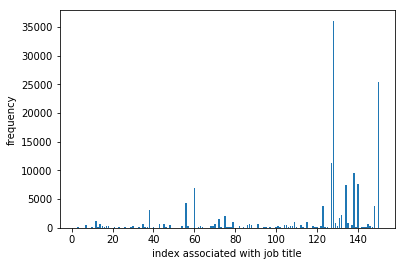

unlabeled jobs indices: [101709, 101710, 101719, 101720, 101729, 101730, 101736, 101740, 101741, 101749, 101750, 101759, 101760, 101765, 101770, 101771, 101775, 101780, 101781, 101782, 101784, 101785, 101787, 101789, 101794, 101795, 101796, 101800, 101801, 101806, 101809, 101812, 101814, 101822, 101833, 101839, 101846, 101847, 101853, 101857, 101866, 101870, 101876, 101877, 101879, 101884, 101886, 101889, 101891, 101892, 101893, 101898, 101899, 101905, 101910, 101913, 101918, 101940, 101944, 101946, 101960, 101971, 101974, 101975, 101979, 101980, 101982, 101986, 101993, 102037, 102044, 102057, 102065, 102077, 102081, 102104, 102105, 102109, 102110, 102112, 102114, 102116, 102119, 102121, 102122, 102123, 102134, 102136, 102139, 102141, 102142, 102143, 102144, 102145, 102149, 102150, 102152, 102164, 102165, 102169, 102170, 102172, 102178, 102186, 102191, 102194, 102196, 102199, 102201, 102202, 102203, 102214, 102215, 102219, 102220, 102222, 102224, 102225, 102229, 102230, 102232, 102236,

In [0]:

#jobTitlesDF.drop_duplicates(keep='first',inplace=True) #todo repickle this  - so we dont do it each time
#labeledJobs,unlabeledJobs = data_helpers.genLabels2(jobTitlesDF,generalJobTitlesDF)
#data_helpers.pickleThis('jobLabels1.pkl',labeledJobs)
#labeledJobs = data_helpers.unpickleThis('/content/gdrive/My Drive/dsci/jobLabels1.pkl')
#labeledJobs = data_helpers.unpickleThis('jobLabels1.pkl')

freq = data_helpers.countFreq(labeledJobs)
#print(freq)
aux = [(freq[key], key) for key in freq]
aux.sort()
aux.reverse()
print("(frequency,job):",aux)
#print(sum(freq.values()))

plt.bar(freq.keys(),freq.values())
plt.xlabel("index associated with job title")
plt.ylabel("frequency")
plt.show()
print("unlabeled jobs indices:",unlabeledJobs)

# **Model**

In [0]:
def initTokenizer():
    #print('tokenizer init')
    tokenizer_obj = tf.keras.preprocessing.text.Tokenizer()
    return tokenizer_obj

def fitTokenizerOnText(tokenizer, text):
    #print('fit tokenizer')
    #fits the tokenizer on text
    #returns vocab size and max len
    tokenizer.fit_on_texts(text)
    vocab_size = len(tokenizer.word_index)+1
    maxLen = max([len(s.split()) for s in text])
    return vocab_size,maxLen

def t2s(tokenizer,string):
    #print('init x test/train tokens')
    ret = tokenizer.texts_to_sequences(string)
    return ret

def padSequence(string, maxLen, defaultPadding = 'post'):
    ret = keras.preprocessing.sequence.pad_sequences(string,maxlen=maxLen,padding=defaultPadding)
    return ret

  
def gen_model(vocab_size, maxLen, e):
    input_layer = keras.layers.Input(shape=(maxLen,),dtype='float32')
    emb = e(input_layer)
    x = Conv1D(100,4,padding='valid',activation='relu',strides=1)(emb)
    x = MaxPooling1D(pool_size=2)(x)
    #x = BatchNormalization()(x)
    x = Conv1D(100,4,padding='valid',activation='relu',strides=1)(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(100,activation='relu')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.3)(x)
    out = Dense(151,activation='softmax')(x)
    model = keras.models.Model(inputs=input_layer,outputs=out)
    model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.00001),metrics=['accuracy'])
    return model
  

def trainModel(model, x, y):
    print('training')
    #history = model.fit(x,y,batch_size=16,epochs=15,verbose=1)
    history = model.fit(x,y,batch_size=8,epochs=20,shuffle=False,verbose=1,validation_split=0.1)
#     model.save_weights('/content/gdrive/My Drive/dsci/modelTest_weights.h5')
#     with open('/content/gdrive/My Drive/dsci/modelTest.h5', 'w') as f:
#       f.write(model.to_json())
    
    model.save("/content/gdrive/My Drive/dsci/modelTest.h5")
    return history

def evaluateModel(model,x,y):
    loss, accuracy = model.evaluate(x,y,verbose=0)
    print('Test Accuracy: %f' % (accuracy*100))
    print('Test Loss: %f' % (loss*100))


def predict_on_Model(model, string, tokenizer,maxLen):
    testSamplesTokens = tokenizer.texts_to_sequences(string)
    # #print('test tokens: ', testSamplesTokens)
    # #print('test tokens: ',testSamplesTokens.shape)
    tsPadded = padSequence(testSamplesTokens,maxLen)

    #print('predicting')
    prediction = model.predict(tsPadded)

    #print(prediction)
    return prediction


Model Prep

In [0]:
#unpickle tokenizer
pickle_in1 = open('/content/gdrive/My Drive/dsci/tokenizer.pkl','rb')
tokenizer = pickle.load(pickle_in1)
pickle_in2 = open('/content/gdrive/My Drive/dsci/vocab_size.pkl','rb')
vocab_size = pickle.load(pickle_in2)
pickle_in3 = open('/content/gdrive/My Drive/dsci/maxLen.pkl','rb')
maxLen = pickle.load(pickle_in3)
pickle_in1.close()
pickle_in2.close()
pickle_in3.close()

x_train, x_test, y_train, y_test = train_test_split(jobTitlesDF["RoleTitle"], labeledJobs,shuffle=True, test_size=.2)

#tokenizer = initTokenizer() #c

#vocab_size, maxLen = fitTokenizerOnText(tokenizer,x_train) #c

x_train_tokens = t2s(tokenizer,x_train)
x_test_tokens = t2s(tokenizer, x_test)

x_train_pad = padSequence(x_train_tokens,maxLen)
x_test_pad = padSequence(x_test_tokens,maxLen)

y_train_hot = keras.utils.to_categorical(y_train,151)
y_test_hot = keras.utils.to_categorical(y_test,151)

# #pickle tokenizer
# with open('/content/gdrive/My Drive/dsci/tokenizer.pkl','wb') as pkf:
#   pickle.dump(tokenizer,pkf)

# with open('/content/gdrive/My Drive/dsci/maxLen.pkl','wb') as pkf:
#   pickle.dump(maxLen,pkf)

# with open('/content/gdrive/My Drive/dsci/vocab_size.pkl','wb') as pkf:
#   pickle.dump(vocab_size,pkf)
  
  
  



Model Training

In [0]:
#------------code from machine learning mastery, slightly edited----------------
embeddings_index = dict()
with open("/content/gdrive/My Drive/dsci/glove.6B.100d.txt",errors='ignore') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Loaded %s word vectors.' % len(embeddings_index))


embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
#-------------end of code from machine learning mastery-------------------------

e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxLen, trainable=False)

# #model here + training
model = gen_model(vocab_size,maxLen,e)
history = trainModel(model, x_train_pad,y_train_hot)

W0821 01:03:37.516648 139735339059072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 01:03:37.529654 139735339059072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 01:03:37.537400 139735339059072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 01:03:37.551603 139735339059072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0821 01:03:37.553127 1397353390

Loaded 400000 word vectors.


W0821 01:03:40.822382 139735339059072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0821 01:03:40.872311 139735339059072 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0821 01:03:41.034977 139735339059072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 01:03:41.173559 139735339059072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_suppor

training
Train on 109982 samples, validate on 12221 samples
Epoch 1/20
109982/109982 [==============================] - 132s 1ms/step - loss: 3.5410 - acc: 0.3558 - val_loss: 2.3795 - val_acc: 0.6810
Epoch 2/20
109982/109982 [==============================] - 128s 1ms/step - loss: 1.8456 - acc: 0.6519 - val_loss: 1.3520 - val_acc: 0.7773
Epoch 3/20
109982/109982 [==============================] - 128s 1ms/step - loss: 1.3890 - acc: 0.7187 - val_loss: 1.0285 - val_acc: 0.8088
Epoch 4/20
109982/109982 [==============================] - 128s 1ms/step - loss: 1.1684 - acc: 0.7556 - val_loss: 0.8512 - val_acc: 0.8282
Epoch 5/20
109982/109982 [==============================] - 128s 1ms/step - loss: 1.0221 - acc: 0.7798 - val_loss: 0.7350 - val_acc: 0.8566
Epoch 6/20
109982/109982 [==============================] - 128s 1ms/step - loss: 0.9131 - acc: 0.8014 - val_loss: 0.6383 - val_acc: 0.8697
Epoch 7/20
109982/109982 [==============================] - 128s 1ms/step - loss: 0.8247 - acc: 0.81

# **Predictions**

In [0]:
text1 = ["data entry clerk - graveyard shift"]
text2 = ["apple technical support"]
text3 = ["entry level software engineer"]
text4 = ["siri - software develoopment engineer"] #has typo
text5 = ["network administrator"]
text6 = ["user interface engineer"]

classifiedJobs = []

# text1 = ["quality engineer- software/hardware"]
# text2 = ["software developer front end (contractor)"]
# text3 = ["front end software engineer"]
# text4 = ["software development engineer I"] #has typo
# text5 = ["it/data integrity specialist (30hrs/wk)"]
# text6 = ["ui/ux developer"]
text7 = ["ui/ux designer"]
text8 = ["graphic designer with ui/ux experience"]

text_samples = [text1,text2,text3,text4,text5,text6,text7,text8]
#text_samples = ['quality engineer- software/hardware',
#                 'software developer front end (contractor)',
#                 'front end software engineer',
#                 'data entry specialist',
#                 'software development engineer I',
#                 'it/data integrity specialist (30hrs/wk)'
#                 'ui/ux developer',
#                 'ui/ux designer',
#                 'graphic designer with ui/ux experience'
#                ]
#when you bring in a new csv file, do dta pre pr. on it (need lowercase + stops removed)

# from keras.models import model_from_json
# with open('/content/gdrive/My Drive/dsci/modelTest.h5','r') as f:
#   model = model_from_json(f.read())
  
# model.load_weights('/content/gdrive/My Drive/dsci/modelTest_weights.h5')

model = keras.models.load_model('/content/gdrive/My Drive/dsci/modelTest.h5')


def getParentTitle(predicted,generalJobTitlesDF):
  
  softwareEngineer = ['Software Engineer',58,19,41,135,27,14,42,59,69,71,129,80,139,104,114,127,78,56,20,34,70]
  webDeveloper = ['Web Developer',116,91,115]
  networkEngineer = ['Network Engineer',67,40,44,51,79,99]
  it = ['IT',0,5,11,94,107,123,31,93,2,4,12,18,33,36,54,106,108,45,38,128,46]
  dataEngineer = ['Data Engineer',102,101,90,119,32,112,97,3,120]
  analyst = ['Analyst',138,65,7,21,43,57,77,113,122]
  ui_ux = ['UI/UX',22,76,75,82,118,145,95,117,146,50,124,111]
  dataScientist = ['Data Scientist',39,85]
  cyberSecurity = ['Cyber Security',98,92,24,52]
  testEngineer = ['Test Engineer',105,55,23]
  allMyJobLabels = [softwareEngineer,webDeveloper, networkEngineer,it,dataEngineer, ui_ux,dataScientist,analyst,cyberSecurity,testEngineer]

  countLists = len(allMyJobLabels)
  counter = 0
  for currentList in allMyJobLabels:
    #print(currentList[1:])
    counter+=1
    #print('looking for ',y_classes, ' in ', currentList[1:])
    if y_classes in currentList[1:]:
      #print('--------found for ',y_classes, ' in ', currentList[1:])
      finalJobRole = currentList[0]
      return finalJobRole
    elif counter == countLists:
      print('*********couldnt find', y_classes, ' in any list')
      finalJobRole = (generalJobTitlesDF['job_title'][y_classes].values)
      return finalJobRole


for testJobs in text_samples:
  prediction = predict_on_Model(model,testJobs,tokenizer,maxLen)
  y_classes = prediction.argmax(axis=-1) -2
  
  #finalJobRole = LabelSimplifier.get_Parent_Title(y_classes,generalJobTitlesDF) 
  finalJobRole = getParentTitle(y_classes,generalJobTitlesDF)
    
  classifiedJobs.append(finalJobRole)
  print(testJobs, '-------->:', finalJobRole, y_classes, '\n')
  
  
  
#labels to add = ui developer, ux developer, ui/ux developer, ui/ux engineer, ui
#this will be a big pain in the butt b/c we'll have to rebuild the look up lists a little bit


#print(model.summary())
loss , accuracy = model.evaluate(x_test_pad,y_test_hot,verbose=0)
print('Test Accuracy: %f' % (accuracy*100))
print('Test Loss: %f' % (loss*100))

['data entry clerk - graveyard shift'] -------->: Data Engineer [120] 

['apple technical support'] -------->: IT [54] 

['entry level software engineer'] -------->: Software Engineer [58] 

['siri - software develoopment engineer'] -------->: Software Engineer [58] 

['network administrator'] -------->: Network Engineer [99] 

*********couldnt find [136]  in any list
['user interface engineer'] -------->: ['engineer'] [136] 

['ui/ux designer'] -------->: UI/UX [118] 

['graphic designer with ui/ux experience'] -------->: Cyber Security [52] 

Test Accuracy: 97.194855
Test Loss: 14.569953


# **Model Evaluation**

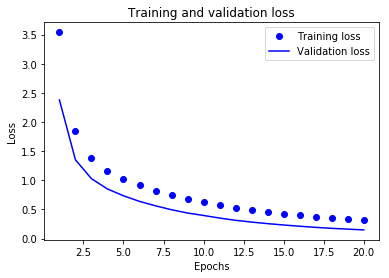

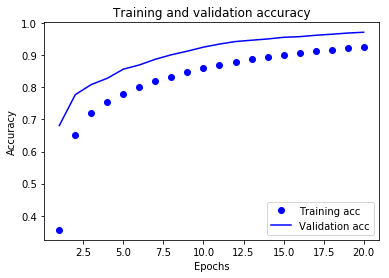

In [0]:
#code from keras to graph results
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()